peaks (array([ 2,  6,  8, 18]), {})
peaks (array([0.64350703, 2.25630555, 0.81615385, 0.73469388]), array([ 3362.5, 12079.5, 13449.5,  1369.5]), array([ 1.85649297,  4.73770774,  7.5       , 17.5       ]), array([ 2.5       ,  6.99401328,  8.31615385, 18.23469388]))


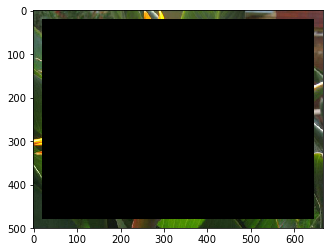

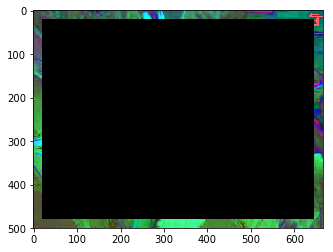

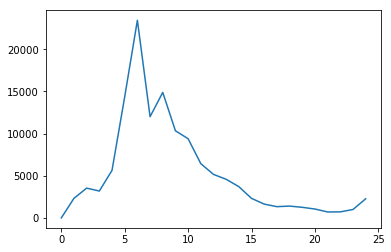

In [132]:
import imageio
import numpy
import scipy
import skimage
from matplotlib import pyplot as plt
from scipy.ndimage import histogram


%matplotlib inline

def crop_frame(img, framesize):
    x, y, z = img.shape
    
    inner_frame_left = framesize
    inner_frame_top = framesize
    inner_frame_width = x - framesize
    inner_frame_height = y - framesize
    
    img[inner_frame_left:inner_frame_width, inner_frame_top:inner_frame_height,:] = 0
    return img

image = imageio.imread('../data/processed/train-valid-combine/8/3295.jpg')
image_frame =  crop_frame(image, 20)
croped_hue = skimage.color.rgb2hsv(image_frame)
hsv_converted_frame = numpy.asarray(croped_hue)

#edge_sobelframe = sobel(hsv_converted_frame[:, :, 0])
#edge_sobelframe = feature.canny(hsv_converted_frame[:, :, 0], sigma=3)
#edge_sobelframe_normalized = edge_sobelframe * 255.0
#print("edge_sobelframe",edge_sobelframe)
#print("edge_sobelframe_normalized",edge_sobelframe_normalized)

bins=histogram(hsv_converted_frame* 255.0, min=0, max=256, bins=25)
bins[0] = 0

print("peaks", scipy.signal.find_peaks(bins))
print("peaks", scipy.signal.peak_widths(bins, peaks=scipy.signal.find_peaks(bins)[0]))

plt.imshow(image)
plt.show()
plt.imshow(hsv_converted_frame)
plt.show()

plt.plot(bins)
plt.show()

image_new = imageio.imread('../data/processed/train-valid-combine/8/3295.jpg')
hsv_image = skimage.color.rgb2hsv(image_new)
hsv_image[inner_frame_left:inner_frame_width, inner_frame_top:inner_frame_height,:] = 0